### **Time Series Prediction with Multilayer Perceptrons**

In [6]:
from google.colab import drive, files
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

Using TensorFlow backend.


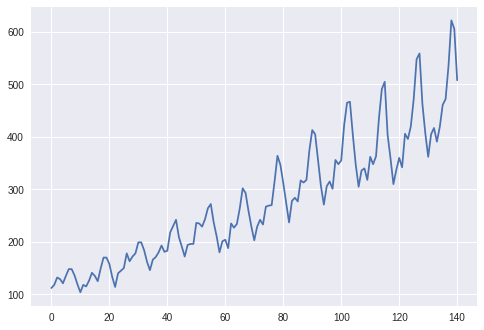

In [12]:
url="https://drive.google.com/uc?export=download&id=1podDpSTE1d_xelALppCvli7Ykz6qaJ64"

dataframe = pd.read_csv(url, usecols=[1], engine='python', skipfooter = 3)
dataset = dataframe.values
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()

In [13]:
# split into train and test sets
train_size = int(len(dataset) * 0.67) 
test_size = len(dataset) - train_size 
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:] 
print(len(train), len(test))

94 47


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [36]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)

[[112. 118. 132. 129. 121. 135. 148. 148. 136. 119.]
 [118. 132. 129. 121. 135. 148. 148. 136. 119. 104.]
 [132. 129. 121. 135. 148. 148. 136. 119. 104. 118.]
 [129. 121. 135. 148. 148. 136. 119. 104. 118. 115.]
 [121. 135. 148. 148. 136. 119. 104. 118. 115. 126.]
 [135. 148. 148. 136. 119. 104. 118. 115. 126. 141.]
 [148. 148. 136. 119. 104. 118. 115. 126. 141. 135.]
 [148. 136. 119. 104. 118. 115. 126. 141. 135. 125.]
 [136. 119. 104. 118. 115. 126. 141. 135. 125. 149.]
 [119. 104. 118. 115. 126. 141. 135. 125. 149. 170.]
 [104. 118. 115. 126. 141. 135. 125. 149. 170. 170.]
 [118. 115. 126. 141. 135. 125. 149. 170. 170. 158.]
 [115. 126. 141. 135. 125. 149. 170. 170. 158. 133.]
 [126. 141. 135. 125. 149. 170. 170. 158. 133. 114.]
 [141. 135. 125. 149. 170. 170. 158. 133. 114. 140.]
 [135. 125. 149. 170. 170. 158. 133. 114. 140. 145.]
 [125. 149. 170. 170. 158. 133. 114. 140. 145. 150.]
 [149. 170. 170. 158. 133. 114. 140. 145. 150. 178.]
 [170. 170. 158. 133. 114. 140. 145. 150. 178.

In [50]:
# create and fit Multilayer Perceptron model
from keras.layers import Dropout

model = Sequential()
model.add(Dense(12, input_dim=look_back, activation= 'relu' ))
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=400, batch_size=5, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/400
 - 0s - loss: 50136.0072
Epoch 2/400
 - 0s - loss: 15733.6727
Epoch 3/400
 - 0s - loss: 3030.0842
Epoch 4/400
 - 0s - loss: 1461.4980
Epoch 5/400
 - 0s - loss: 1347.5231
Epoch 6/400
 - 0s - loss: 1305.5751
Epoch 7/400
 - 0s - loss: 1275.6491
Epoch 8/400
 - 0s - loss: 1269.6150
Epoch 9/400
 - 0s - loss: 1261.2733
Epoch 10/400
 - 0s - loss: 1335.1978
Epoch 11/400
 - 0s - loss: 1242.7042
Epoch 12/400
 - 0s - loss: 1203.7443
Epoch 13/400
 - 0s - loss: 1210.4245
Epoch 14/400
 - 0s - loss: 1179.4754
Epoch 15/400
 - 0s - loss: 1166.0440
Epoch 16/400
 - 0s - loss: 1139.5559
Epoch 17/400
 - 0s - loss: 1123.7595
Epoch 18/400
 - 0s - loss: 1134.9183
Epoch 19/400
 - 0s - loss: 1078.0255
Epoch 20/400
 - 0s - loss: 1057.9768
Epoch 21/400
 - 0s - loss: 1009.6124
Epoch 22/400
 - 0s - loss: 981.4284
Epoch 23/400
 - 0s - loss: 963.3606
Epoch 24/400
 - 0s - loss: 970.3381
Epoch 25/400
 - 0s - loss: 841.8279
Epoch 26/400
 - 0s - loss: 854.9778
Epoch 27/400
 - 0s - loss: 784.8420
Epoch 28/400
 

In [51]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 142.71 MSE (11.95 RMSE)
Test Score: 428.96 MSE (20.71 RMSE)


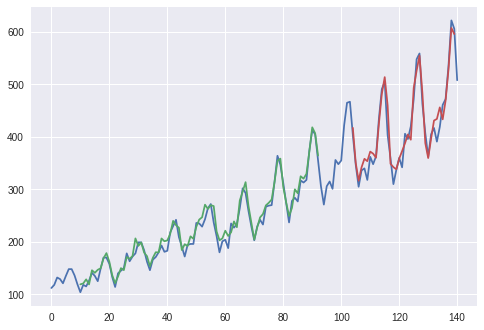

In [52]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### **LSTM**

In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, return_sequences=True, input_shape=(None, 1))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
 - 2s - loss: 0.0580
Epoch 2/100
 - 0s - loss: 0.0479
Epoch 3/100
 - 0s - loss: 0.0384
Epoch 4/100
 - 0s - loss: 0.0309
Epoch 5/100
 - 0s - loss: 0.0249
Epoch 6/100
 - 0s - loss: 0.0213
Epoch 7/100
 - 0s - loss: 0.0186
Epoch 8/100
 - 0s - loss: 0.0174
Epoch 9/100
 - 0s - loss: 0.0168
Epoch 10/100
 - 0s - loss: 0.0166
Epoch 11/100
 - 0s - loss: 0.0162
Epoch 12/100
 - 0s - loss: 0.0159
Epoch 13/100
 - 0s - loss: 0.0156
Epoch 14/100
 - 0s - loss: 0.0153
Epoch 15/100
 - 0s - loss: 0.0150
Epoch 16/100
 - 0s - loss: 0.0146
Epoch 17/100
 - 0s - loss: 0.0142
Epoch 18/100
 - 0s - loss: 0.0138
Epoch 19/100
 - 0s - loss: 0.0134
Epoch 20/100
 - 0s - loss: 0.0129
Epoch 21/100
 - 0s - loss: 0.0126
Epoch 22/100
 - 0s - loss: 0.0120
Epoch 23/100
 - 0s - loss: 0.0116
Epoch 24/100
 - 0s - loss: 0.0111
Epoch 25/100
 - 0s - loss: 0.0106
Epoch 26/100
 - 0s - loss: 0.0100
Epoch 27/100
 - 0s - loss: 0.0093
Epoch 28/100
 - 0s - loss: 0.0088
Epoch 29/100
 - 0s - loss: 0.0082
Epoch 30/100
 - 0s - lo

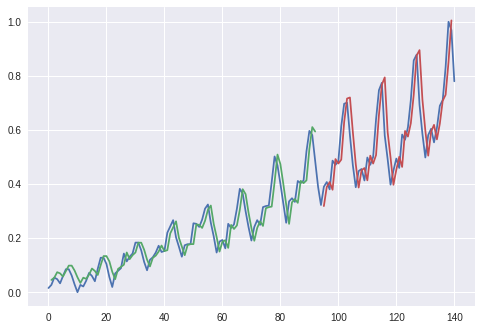

In [60]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_dim=look_back, return_sequences=True))
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=100, batch_size=5, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( 'Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### **LSTM and Statefulness  25.18**

In [68]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

batch_size = 1
                                
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
for i in range(100):
  model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
  model.reset_states()
  
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)

testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( 'Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
 - 4s - loss: 0.0055
Epoch 1/1
 - 1s - loss: 0.0307
Epoch 1/1
 - 1s - loss: 0.0230
Epoch 1/1
 - 1s - loss: 0.0202
Epoch 1/1
 - 1s - loss: 0.0179
Epoch 1/1
 - 1s - loss: 0.0152
Epoch 1/1
 - 1s - loss: 0.0120
Epoch 1/1
 - 1s - loss: 0.0087
Epoch 1/1
 - 1s - loss: 0.0063
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0054
Epoch 1/1
 - 1s - loss: 0.0054
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/

ValueError: ignored